In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Downloads\\sleep_data.csv")

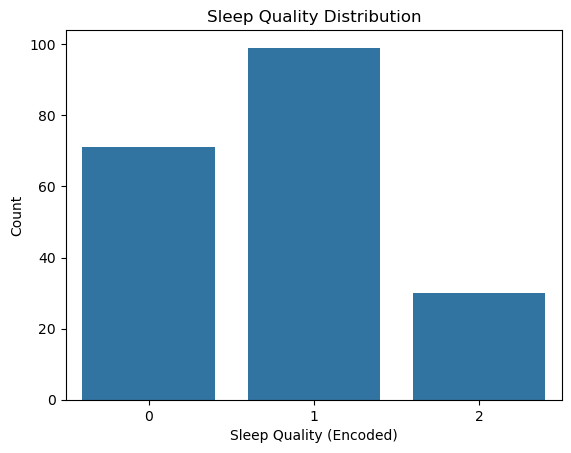

In [4]:
# Encode categorical columns
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['sleep_quality'] = LabelEncoder().fit_transform(df['sleep_quality'])

# 3. Visualize Dataset
# 3.1 Sleep Quality Count
sns.countplot(data=df, x='sleep_quality')
plt.title('Sleep Quality Distribution')
plt.xlabel('Sleep Quality (Encoded)')
plt.ylabel('Count')
plt.show()

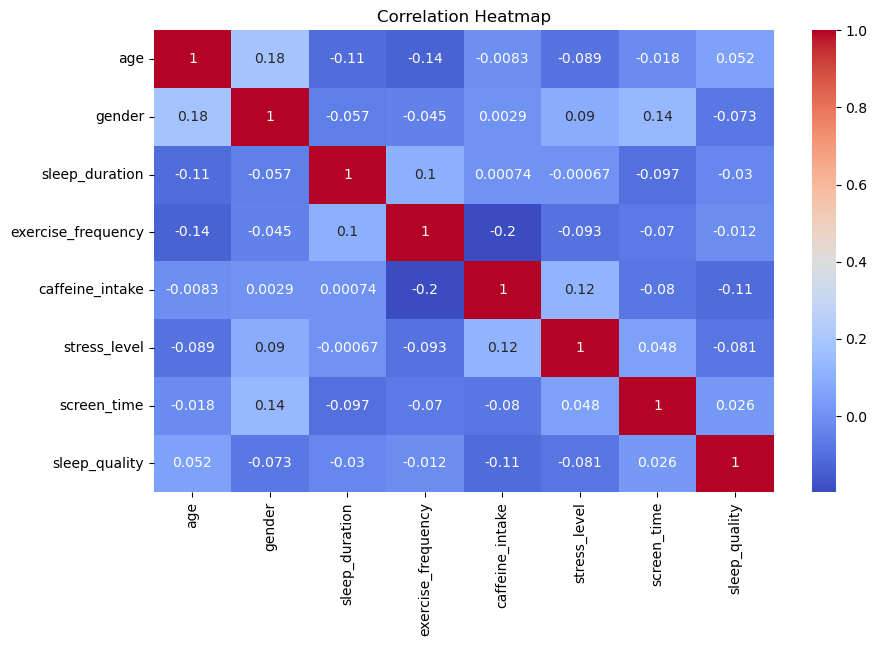

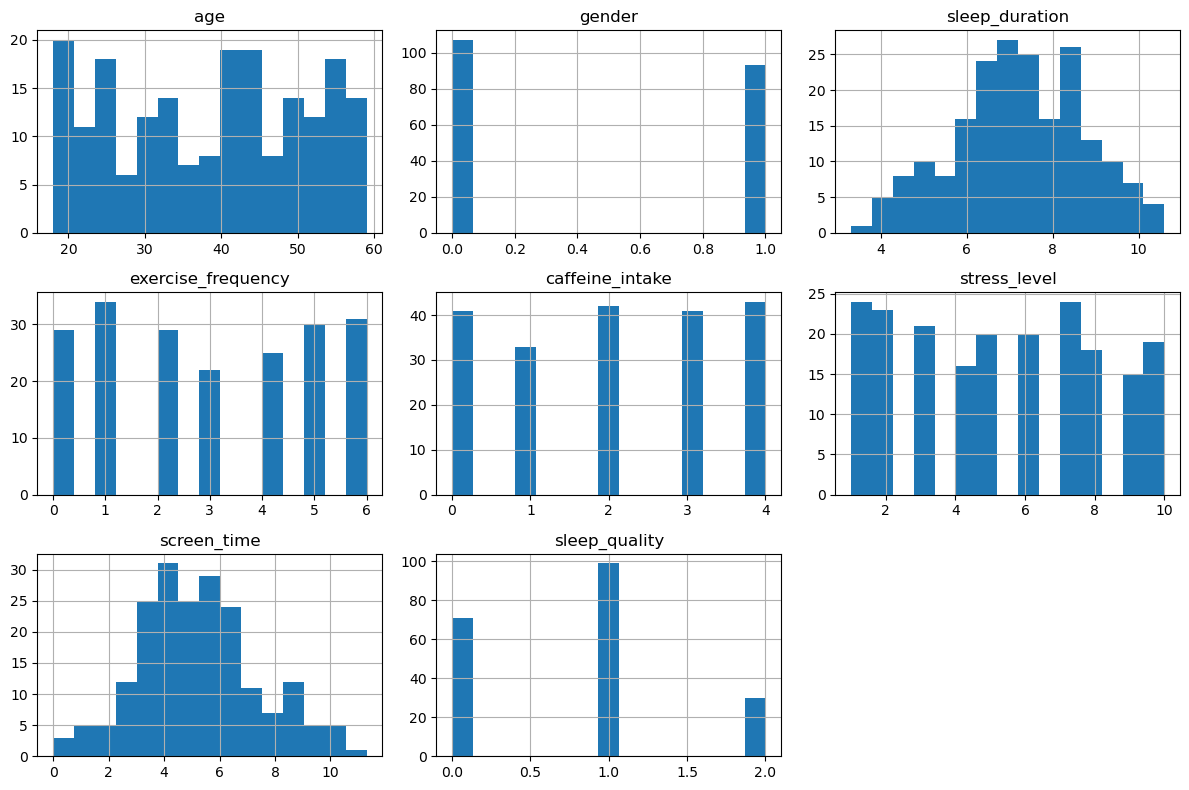

In [5]:
# 3.2 Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3.3 Feature Distributions
df.hist(bins=15, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [6]:
# 4. Preprocess
X = df.drop('sleep_quality', axis=1)
y = df['sleep_quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Train and Evaluate Models
results = {}

In [7]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
results["Random Forest"] = accuracy_score(y_test, rf_pred)

In [8]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
results["Logistic Regression"] = accuracy_score(y_test, lr_pred)

In [9]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
results["SVM"] = accuracy_score(y_test, svm_pred)

In [10]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
results["Decision Tree"] = accuracy_score(y_test, dt_pred)

In [11]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
results["KNN"] = accuracy_score(y_test, knn_pred)

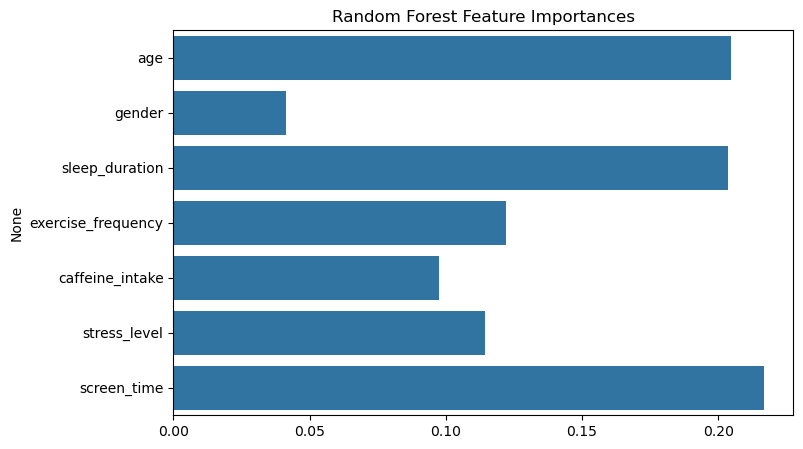

In [12]:
# 6. Feature Importance (Random Forest)
importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Random Forest Feature Importances")
plt.show()

             Algorithm  Accuracy
0        Random Forest     0.400
1  Logistic Regression     0.450
2                  SVM     0.525
3        Decision Tree     0.425
4                  KNN     0.475


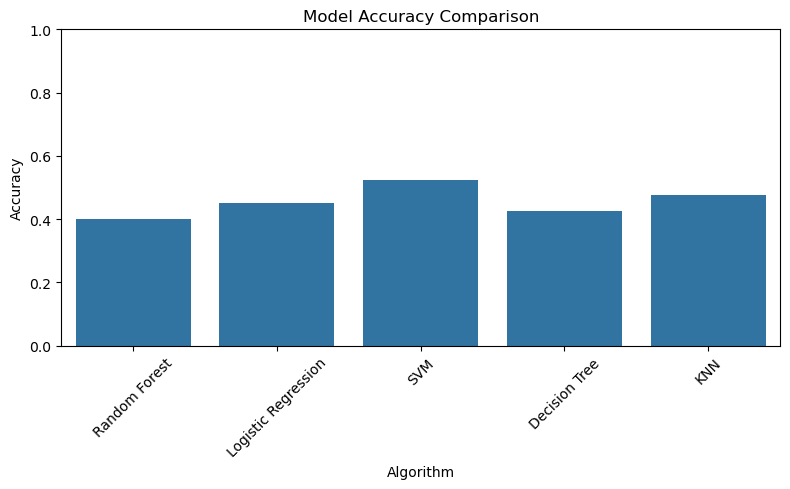

In [13]:
# 7. Comparison Table & Plot
results_df = pd.DataFrame(list(results.items()), columns=["Algorithm", "Accuracy"])
print(results_df)

# Bar Plot of Accuracies
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x='Algorithm', y='Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()